## LIME

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Define a preprocessing function for LIME
def preprocess_input_lime(img):
    return img / 255.0

In [57]:
# Convert grayscale image to RGB for LIME (visual only)
def gray_to_rgb(img):
    if img.shape[-1] == 1:
        return np.repeat(img, 3, axis=-1)
    return img

# Pick a grayscale test image
sample_image = X_test[0]  # shape (64, 64, 1)
sample_image_rgb = gray_to_rgb(sample_image)

# LIME explainer
explainer = lime_image.LimeImageExplainer()

# Prediction function — convert back to grayscale for the model
def predict_fn(images):
    # Convert 3-channel RGB back to grayscale expected by model
    gray_images = np.expand_dims(images[:, :, :, 0], axis=-1)
    return model.predict(gray_images, verbose=0)

# Run LIME
explanation = explainer.explain_instance(
    sample_image_rgb.astype('double'),  # RGB version
    predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

# Visualize result
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    hide_rest=False,
    num_features=5,
    min_weight=0.0
)

  0%|          | 0/1000 [00:00<?, ?it/s]

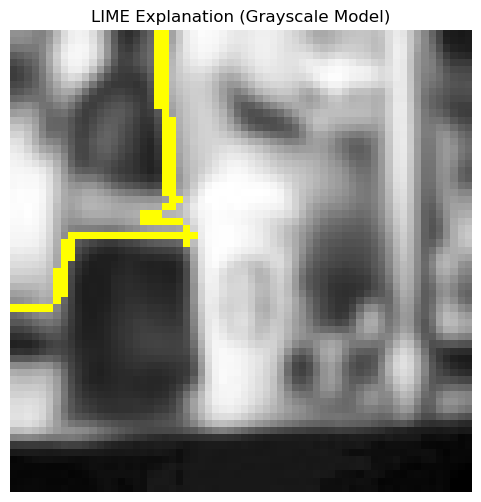

In [58]:
plt.figure(figsize=(6, 6))
plt.title("LIME Explanation (Grayscale Model)")
plt.imshow(mark_boundaries(temp, mask))
plt.axis('off')
plt.show()

## Observations:
- The yellow boundaries mark the top superpixels (segments) that influenced the prediction the most.

- In this explanation, only a narrow vertical and horizontal region was highlighted, which suggests:

- The model's decision was heavily influenced by a small section of the image.

- This region might include features such as edges, contours, or object boundaries.

- The rest of the image appears to have minimal impact on the prediction.

## Interpretation:
- The model may be overfitting to specific structural elements in grayscale, rather than learning - holistic object-level representations.

- The highlighted areas are crisp and well-localized, indicating the CNN is focusing on certain textures or object outlines.

- If the model misclassifies the image, it could be because these narrow regions are not representative of the entire class.